In [217]:
import numpy as np
import matplotlib.pyplot as plt

In [218]:
def h(a,b,x): #hypothesis function
    return a*x+b

def mse(a,b,x,y): #loss function
    return np.mean((h(a,b,x) - y)**2)

def gradient(a,b,x,y): #mse derivatives
    return np.mean(x*(a*x+b-y), axis=-1), np.mean(a*x+b-y, axis=-1)

def generate_data(nb): #generate data with noise
    x = np.array([])
    y = np.array([])
    for i in range(nb):
        x = np.insert(x, len(x), i)
        y = np.insert(y, len(y), i/2 + np.random.rand()*20)
    return x,y

def shuffle(x,y):
    s = np.arange(len(x))
    np.random.shuffle(s)
    return x[s], y[s]

In [219]:
def vanilla_gradient_descent(a,b,x,y,lr=1e-5,epsilon=1e-4):
    prev_error = 0
    error = np.array([])
    while True:
        gradient_a, gradient_b = gradient(a,b,x,y)
#         print(abs(mse(a, b, x, y) - prev_error))
        if abs(mse(a, b, x, y) - prev_error) < epsilon:
            break
        prev_error = mse(a,b,x,y)
        error = np.insert(error, len(error), prev_error)

        a -= lr * gradient_a
        b -= lr * gradient_b
    return a, b, error

In [220]:
def momentum_gradient_descent(a,b,x,y,lr=1e-5,momentum=0.9,epsilon=1e-4, batch_size=0):
    if batch_size == 0: batch_size = len(x)
    prev_grad_a = 0
    prev_grad_b = 0
    prev_error = 0
    error = np.array([])
    while True:
        x_shuffled, y_shuffled = shuffle(x,y)
        gradient_a, gradient_b = gradient(a,b,x_shuffled[:batch_size],y_shuffled[:batch_size])
#         print(abs(mse(a, b, x_shuffled, y_shuffled) - prev_error))
        if abs(mse(a, b, x_shuffled, y_shuffled) - prev_error) < epsilon:
            break
        prev_error = mse(a,b,x_shuffled,y_shuffled)
        error = np.insert(error, len(error), prev_error)

        a -= lr * gradient_a + momentum * prev_grad_a
        b -= lr * gradient_b + momentum * prev_grad_b
        prev_grad_a = lr * gradient_a + momentum * prev_grad_a
        prev_grad_b = lr * gradient_b + momentum * prev_grad_b
    return a, b, error

In [221]:
def adagrad_gradient_descent(a, b, x, y, lr=1e-5, epsilon=1e-4):
    prev_error = 0
    adagrad_a = 0
    adagrad_b = 0
    error = np.array([])
    while True:
        gradient_a, gradient_b = gradient(a, b, x, y)
#         print(abs(mse(a, b, x, y) - prev_error))
        if abs(mse(a, b, x, y) - prev_error) < epsilon:
            break
        prev_error = mse(a, b, x, y)
        error = np.insert(error, len(error), prev_error)

        adagrad_a += gradient_a**2
        adagrad_b += gradient_b**2
        a -= (lr / (adagrad_a**0.5 + 1e-8)) * gradient_a
        b -= (lr / (adagrad_b**0.5 + 1e-8)) * gradient_b
    return a, b, error

In [222]:
def rmsprop_gradient_descent(a, b, x, y, lr=1e-5, gamma=0.9, epsilon=1e-4):
    prev_error = 0
    rmsprop_a = 0
    rmsprop_b = 0
    error = np.array([])
    while True:
        gradient_a, gradient_b = gradient(a, b, x, y)
#         print(abs(mse(a, b, x, y) - prev_error))
        if abs(mse(a, b, x, y) - prev_error) < epsilon:
            break
        prev_error = mse(a, b, x, y)
        error = np.insert(error, len(error), prev_error)

        rmsprop_a = gamma * rmsprop_a + (1-gamma) * (gradient_a**2)
        rmsprop_b = gamma * rmsprop_b + (1-gamma) * (gradient_b**2)
        a -= (lr / (rmsprop_a**0.5 + 1e-8)) * gradient_a
        b -= (lr / (rmsprop_b**0.5 + 1e-8)) * gradient_b
    return a, b, error

In [223]:
def adam_gradient_descent(a, b, x, y, lr=1e-5, b1=0.9, b2=0.999, epsilon=1e-4):
    prev_error = 0
    m_a = v_a = m_b = v_b = 0
    moment_m_a = moment_v_a = moment_m_b = moment_v_b = 0
    t = 0
    error = np.array([])
    while True:
        gradient_a, gradient_b = gradient(a, b, x, y)
#         print(abs(mse(a, b, x, y) - prev_error))
        if abs(mse(a, b, x, y) - prev_error) < epsilon:
            break
        t += 1
        prev_error = mse(a, b, x, y)
        error = np.insert(error, len(error), prev_error)

        m_a = b1 * m_a + (1-b1)*gradient_a
        v_a = b2 * v_a + (1-b2)*gradient_a**2
        m_b = b1 * m_b + (1-b1)*gradient_b
        v_b = b2 * v_b + (1-b2)*gradient_b**2
        moment_m_a = m_a / (1-b1**t)
        moment_v_a = v_a / (1-b2**t)
        moment_m_b = m_b / (1-b1**t)
        moment_v_b = v_b / (1-b2**t)
        a -= (lr*moment_m_a) / (moment_v_a**0.5 + 1e-8)
        b -= (lr*moment_m_b) / (moment_v_b**0.5 + 1e-8)
    return a, b, error

In [224]:
def adamax_gradient_descent(a, b, x, y, lr=1e-5, b1=0.9, b2=0.999, epsilon=1e-4):
    prev_error = 0
    m_a = u_a = m_b = u_b = 0
    t = 0
    error = np.array([])
    while True:
        gradient_a, gradient_b = gradient(a, b, x, y)
#         print(abs(mse(a, b, x, y) - prev_error))
        if abs(mse(a, b, x, y) - prev_error) < epsilon:
            break
        t += 1
        prev_error = mse(a, b, x, y)
        error = np.insert(error, len(error), prev_error)

        m_a = b1*m_a + (1-b1)*gradient_a
        u_a = max(b2*u_a, abs(gradient_a))
        m_b = b1*m_b + (1-b1)*gradient_b
        u_b = max(b2*u_b, abs(gradient_b))

        a -= (lr / (1-(b1**t)))*(m_a/u_a)
        b -= (lr / (1-(b1**t)))*(m_b/u_b)
    return a, b, error

In [225]:
''' FIXME: better implementation '''
def adadelta_gradient_descent(a, b, x, y, lr=1e-5, gamma=0.9, epsilon=1e-4):
    prev_error = 0
    gradient_squared_a = 0
    gradient_squared_b = 0
    v_a = v_b = 0
    delta_a = 0
    delta_b = 0
    error = np.array([])
    while True:
        gradient_a, gradient_b = gradient(a, b, x, y)
#         print(abs(mse(a, b, x, y) - prev_error))
        if abs(mse(a, b, x, y) - prev_error) < epsilon:
            break
        prev_error = mse(a, b, x, y)
        error = np.insert(error, len(error), prev_error)

        gradient_squared_a = gamma * gradient_squared_a + (1-gamma) * (gradient_a**2)
        gradient_squared_b = gamma * gradient_squared_b + (1-gamma) * (gradient_b**2)

        delta_a = gamma * delta_a + (1-gamma) * (v_a**2)
        delta_b = gamma * delta_b + (1-gamma) * (v_b**2)
        v_a = -(gradient_a*delta_a**0.5 + 1e-8) / (gradient_squared_a**0.5 + 1e-8)
        v_b = -(gradient_b*delta_b**0.5 + 1e-8) / (gradient_squared_b**0.5 + 1e-8)

        a += v_a
        b += v_b
    return a, b, error

In [226]:
def nesterov_gradient_descent(a, b, x, y, lr=1e-5, gamma=0.9, epsilon=1e-4):
    prev_error = 0
    v_a = v_b = 0
    error = np.array([])
    while True:
        a_tmp = a - gamma*v_a
        b_tmp = b - gamma*v_b
        gradient_a, gradient_b = gradient(a_tmp, b_tmp, x, y)
#         print(abs(mse(a, b, x, y) - prev_error))
        if abs(mse(a, b, x, y) - prev_error) < epsilon:
            break
        prev_error = mse(a, b, x, y)
        error = np.insert(error, len(error), prev_error)

        v_a = lr * gradient_a
        v_b = lr * gradient_b

        a -= v_a
        b -= v_b
    return a, b, error

In [227]:
def nadam_gradient_descent(a, b, x, y, lr=1e-5, b1=0.9, b2=0.999, epsilon=1e-4):
    prev_error = 0
    m_a = v_a = m_b = v_b = 0
    moment_m_a = moment_v_a = moment_m_b = moment_v_b = 0
    t = 0
    error = np.array([])
    while True:
        gradient_a, gradient_b = gradient(a, b, x, y)
#         print(abs(mse(a, b, x, y) - prev_error))
        if abs(mse(a, b, x, y) - prev_error) < epsilon:
            break
        t += 1
        prev_error = mse(a, b, x, y)
        error = np.insert(error, len(error), prev_error)

        m_a = b1 * m_a + (1-b1)*gradient_a
        v_a = b2 * v_a + (1-b2)*gradient_a**2
        m_b = b1 * m_b + (1-b1)*gradient_b
        v_b = b2 * v_b + (1-b2)*gradient_b**2
        moment_m_a = m_a / (1-b1**t)
        moment_v_a = v_a / (1-b2**t)
        moment_m_b = m_b / (1-b1**t)
        moment_v_b = v_b / (1-b2**t)
        a -= (lr / moment_v_a**0.5 + 1e-8) * (b1*moment_m_a + (1-b1)*gradient_a/(1-b1**t))
        b -= (lr / moment_v_b**0.5 + 1e-8) * (b1*moment_m_b + (1-b1)*gradient_b/(1-b1**t))
    return a, b, error

In [228]:
x, y = generate_data(1000)
# normalization
x -= np.mean(x)
x /= np.std(x)
y -= np.mean(y)
y /= np.std(y)

In [229]:
regression_subplot = plt.subplot(221)
error_subplot = plt.subplot(222)

In [230]:
a_0, b_0 = np.random.rand(), np.random.rand()

In [231]:
'''
vanilla
'''
a, b, error = vanilla_gradient_descent(a_0, b_0, x, y, lr=1e-1)
prediction = h(a,b,x)
regression_subplot.plot(x, prediction, color="#20B2AA", label="vanilla")
error_subplot.plot(error, color="#20B2AA", label="vanilla")
print("a =",a,", b =",b)

a = 0.981638276859 , b = 0.0106908810627


In [232]:
'''
momentum_batch
'''
a, b, error = momentum_gradient_descent(np.random.rand(), np.random.rand(), x, y, lr=1e-1, batch_size=250, momentum=0.9)
prediction = h(a,b,x)
regression_subplot.plot(x, prediction, color="r", label="momentum_batch")
error_subplot.plot(error, color="r", label="momentum_batch")
print("a =",a,", b =",b)

a = 1.00480769489 , b = -0.00446494123616


In [233]:
'''
adagrad
'''
a, b, error = adagrad_gradient_descent(np.random.rand(), np.random.rand(), x, y, lr=1e-1)
prediction = h(a,b,x)
regression_subplot.plot(x, prediction, color="g", label="adagrad")
error_subplot.plot(error, color="g", label="adagrad")
print("a =",a,", b =",b)

a = 0.979761000162 , b = 0.0208789246887


In [234]:
'''
rmsprop
'''
a, b, error = rmsprop_gradient_descent(np.random.rand(), np.random.rand(), x, y, lr=1e-1)
prediction = h(a,b,x)
regression_subplot.plot(x, prediction, color="#ff008c", label="rmsprop")
error_subplot.plot(error, color="#ff008c", label="rmsprop")
print("a =",a,", b =",b)

a = 0.996282509378 , b = 0.00250186513046


In [235]:
'''
adam
'''
a, b, error = adam_gradient_descent(np.random.rand(), np.random.rand(), x, y, lr=1e-1)
prediction = h(a,b,x)
regression_subplot.plot(x, prediction, color="purple", label="adam")
error_subplot.plot(error, color="purple", label="adam")
print("a =",a,", b =",b)

a = 1.00268852848 , b = -0.0542543308622


In [236]:
'''
adamax
'''
a, b, error = adamax_gradient_descent(np.random.rand(), np.random.rand(), x, y, lr=1e-1)
prediction = h(a,b,x)
regression_subplot.plot(x, prediction, color="#4cff00", label="adamax")
error_subplot.plot(error, color="#4cff00", label="adamax")
print("a =",a,", b =",b)

a = 0.97512346473 , b = 0.0175329861447


In [237]:
'''
adadelta
'''
''' FIXME '''
# a, b, error = adadelta_gradient_descent(np.random.rand(), np.random.rand(), x, y, lr=1e-1)
# prediction = h(a,b,x)
# regression_subplot.plot(x, prediction, color="#00ffe9", label="adadelta")
# error_subplot.plot(error, color="#00ffe9", label="adadelta")
# print("a =",a,", b =",b)

' FIXME '

In [238]:
'''
nesterov
'''
a, b, error = nesterov_gradient_descent(np.random.rand(), np.random.rand(), x, y, lr=1e-1, gamma=0.9)
prediction = h(a,b,x)
regression_subplot.plot(x, prediction, color="#D8A373", label="nesterov")
error_subplot.plot(error, color="#D8A373", label="nesterov")
print("a =",a,", b =",b)

a = 0.980832758323 , b = 0.0108075395099


In [239]:
'''
nadam
'''
a, b, error = nadam_gradient_descent(np.random.rand(), np.random.rand(), x, y, lr=1e-1)
prediction = h(a,b,x)
regression_subplot.plot(x, prediction, color="orange", label="nadam")
error_subplot.plot(error, color="orange", label="nadam")
print("a =",a,", b =",b)

a = 0.937201992861 , b = 0.00200415482187


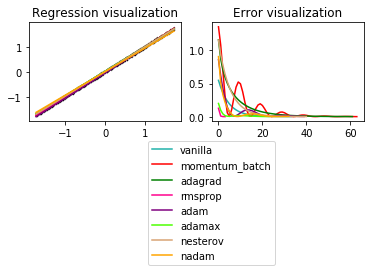

In [240]:
#Set titles
regression_subplot.set_title("Regression visualization")
error_subplot.set_title("Error visualization")

regression_subplot.scatter(x, y, color="black", s=0.1)
plt.legend(bbox_to_anchor=(0, -0.2), loc=9, borderaxespad=0.)
plt.show()